# Predictive Marketing: Unsupervised Learning

collaborator: Kalam Park

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

## K-Means Clustering 

K-means clustering is an iterative algorithm that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean. The means are commonly called the "centroids"; note that they are not, in general, points from the data set, although they live in the same space.

The algorithm proceeds as follows:

1. Choose the number of clusters k.
2. Initialize k centroids.
3. Assign each data point to the closest centroid.
4. Recompute the centroids as the mean of all data points assigned to it.
5. Repeat steps 3 and 4 until the centroids do not change.

One way to initialize the centroids is to randomly select k data points from the dataset. Another method is to use k-means++, which generally leads to faster convergence.

K-means is sensitive to the initial choice of centroids. A bad initialization can cause the algorithm to converge to a suboptimal solution, or even to diverge. One way to mitigate this issue is to run the algorithm multiple times with different initializations and choose the solution with the lowest sum of squared distances between the data points and the centroids.

K-means is a popular choice for clustering because it is relatively simple to implement and can scale to large datasets. However, it has some drawbacks. It assumes that the clusters are spherical and equally sized, which is not always the case in real-world data. It is also sensitive to outlier data points, as they can significantly affect the position of the centroids. Finally, the algorithm is sensitive to the value of k, which the researcher must specify in advance.

In [2]:
df = pd.read_csv('data/main_df.csv')

In [3]:
df

,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,time_of_day,time_am_pm,order_time_general,days_past,number_cart_order
0,0,2425083,49125,1,Tue,18,0,17,1,0,13,pantry,baking ingredients,6,PM,The order was made in the evening,0-5 days,1-5 orders
1,1,2425083,49125,1,Tue,18,0,91,2,0,16,dairy eggs,soy lactosefree,6,PM,The order was made in the evening,0-5 days,1-5 orders
2,2,2425083,49125,1,Tue,18,0,36,3,0,16,dairy eggs,butter,6,PM,The order was made in the evening,0-5 days,1-5 orders
3,3,2425083,49125,1,Tue,18,0,83,4,0,4,produce,fresh vegetables,6,PM,The order was made in the evening,0-5 days,1-5 orders
4,4,2425083,49125,1,Tue,18,0,83,5,0,4,produce,fresh vegetables,6,PM,The order was made in the evening,0-5 days,1-5 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,2019496,3390742,199430,16,Wed,18,5,83,8,0,4,produce,fresh vegetables,6,PM,The order was made in the evening,0-5 days,6-10 orders
2019497,2019497,458285,128787,42,Tue,19,3,115,1,1,7,beverages,water seltzer sparkling water,7,PM,The order was made in the evening,0-5 days,1-5 orders
2019498,2019498,458285,128787,42,Tue,19,3,32,2,1,4,produce,packaged produce,7,PM,The order was made in the evening,0-5 days,1-5 orders
2019499,2019499,458285,128787,42,Tue,19,3,32,3,1,4,produce,packaged produce,7,PM,The order was made in the evening,0-5 days,1-5 orders


    Let's create a contingency table (or crosstab) to show the frequency distribution of two variables ('user_id' and 'department')

    This can be useful for understanding the distribution of users across the different departments of the dataset

In [4]:
cross_tb = pd.crosstab(df['user_id'], df['department'])

In [5]:
cross_tb.head(15)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
13,0,0,2,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,3,1
17,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
21,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
22,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,0,0,5,0


    let's first run K-means with five clusters as an experimental test
-  Performing an initial test run with a set number of clusters can help determine an appropriate number of clusters for your data. 
- The K-means algorithm tries to minimize the sum of squared distances between each data point and its cluster centroid. 
- Choosing too few or too many clusters can result in poor fits to the data. An initial test run allows you to find a good balance and produce more accurate clusters. 

In [6]:
# RUNNING K-MEANS
X_train = cross_tb.values

# WE WILL START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=3, random_state=540)
kmeans = kmeans.fit(cross_tb)
predictions = kmeans.predict(cross_tb)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [0 0 0 ... 0 2 0]
The Inertia is : 6284972.25627674


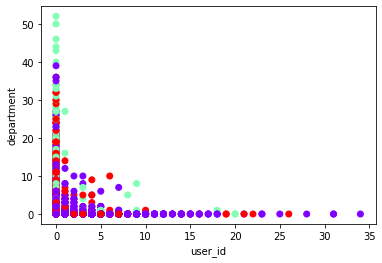

In [7]:
# Assign the cluster labels to a new column in the dataframe
cross_tb['cluster'] = kmeans.labels_

# Extract the x and y coordinates of the data points
x = cross_tb.iloc[:, 0]
y = cross_tb.iloc[:, 1]

# Create a scatter plot of the data points, colored by cluster
plt.scatter(x, y, c=cross_tb['cluster'], cmap='rainbow')

# Add labels and show the plot
plt.xlabel('user_id')
plt.ylabel('department')
plt.show()

In [8]:
#Kmeans on a range of clusters in order to target the optimal amount 
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)

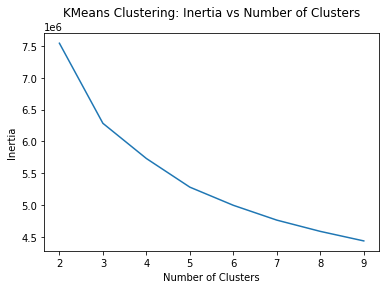

In [9]:
# Create the line plot
plt.plot(no_of_clusters, inertia)

# Add labels and a title to the plot
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('KMeans Clustering: Inertia vs Number of Clusters')

# Show the plot
plt.show()

    From the above plot, you can see that the inertia is in a steep decline especially between 2-4. In the next series of code I will re-run Kmeans using 4 clusters 

In [19]:
# RE-RUNNNG K-MEANS ON 5 CLUSTERS
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,29416,9873,2060,63924


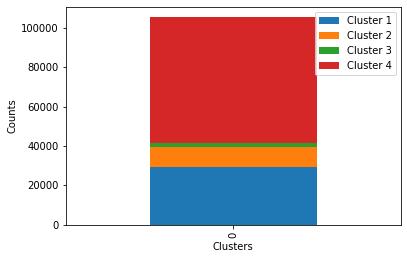

In [20]:
countscldf.plot(kind='bar', stacked=True)
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.show()